In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
import json
from pprint import pprint

from urllib.error import HTTPError
import openweathermapy as ow
import time

# Import API key
from api_keys import api_key


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
url = "http://api.worldbank.org/v2/"
format = "json"

countryjson = requests.get(f"{url}countries?format={format}").json()
pprint(countryjson)

[{'page': 1, 'pages': 7, 'per_page': '50', 'total': 304},
 [{'adminregion': {'id': '', 'iso2code': '', 'value': ''},
   'capitalCity': 'Oranjestad',
   'id': 'ABW',
   'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'},
   'iso2Code': 'AW',
   'latitude': '12.5167',
   'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'},
   'longitude': '-70.0167',
   'name': 'Aruba',
   'region': {'id': 'LCN',
              'iso2code': 'ZJ',
              'value': 'Latin America & Caribbean '}},
  {'adminregion': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'},
   'capitalCity': 'Kabul',
   'id': 'AFG',
   'incomeLevel': {'id': 'LIC', 'iso2code': 'XM', 'value': 'Low income'},
   'iso2Code': 'AF',
   'latitude': '34.5228',
   'lendingType': {'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'},
   'longitude': '69.1761',
   'name': 'Afghanistan',
   'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'}},
  {'adminregion': {'id': '', 'iso2code': '', 

In [52]:
countries = countryjson[1]

In [53]:
list = []

for country in countries:
    name = country["name"]
    list.append(name)

In [9]:
len(list)

50

In [10]:
capital = pd.read_csv("capitalcity.csv")
happiness = pd.read_csv("Happiness2019.csv")


In [11]:
capital.head()


,Country,Capital City
0,Afghanistan,Kabul
1,Albania,Tirana
2,Algeria,Algiers
3,Andorra,Andorra la Vella
4,Angola,Luanda


In [12]:
happiness.head()

,Country,Ladder
0,Finland,1
1,Denmark,2
2,Norway,3
3,Iceland,4
4,Netherlands,5


In [13]:
mergedf = pd.merge(happiness, capital, on="Country", how="left")
mergedf.head()

,Country,Ladder,Capital City
0,Finland,1,Helsinki
1,Denmark,2,Copenhagen
2,Norway,3,Oslo
3,Iceland,4,Reykjavik
4,Netherlands,5,Amsterdam


In [14]:
mergedf.count()

Country         156
Ladder          156
Capital City    148
dtype: int64

In [15]:
outputfile = mergedf.to_csv("capitalmerged.csv", encoding="utf-8", index=False)


In [42]:
mergedf2 = mergedf.dropna(how="any")
mergedf2.count()

Country         148
Ladder          148
Capital City    148
dtype: int64

In [43]:
mergedf2.head()

,Country,Ladder,Capital City
0,Finland,1,Helsinki
1,Denmark,2,Copenhagen
2,Norway,3,Oslo
3,Iceland,4,Reykjavik
4,Netherlands,5,Amsterdam


In [41]:
# Starting URL for Weather Map API Call
baseurl = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


# create setting and desired_keys
settings = {'units':'Imperial','appid':api_key}
summary = ['sys.country','main.temp_max','main.temp_min']


In [23]:
capitals = mergedf["Capital City"].tolist()
capitals

['Helsinki',
 'Copenhagen',
 'Oslo',
 'Reykjavik',
 'Amsterdam',
 'Bern',
 'Stockholm',
 'Wellington',
 'Ottawa',
 'Vienna',
 'Canberra',
 'San Jose',
 'Tel Aviv ',
 'Luxembourg',
 'London',
 'Dublin',
 'Berlin',
 'Brussels',
 'Washington D.C.',
 'Prague',
 'Abu Dhabi',
 'Valletta',
 'Mexico City',
 'Paris',
 'Taipei',
 'Santiago',
 'Guatemala City',
 'Riyadh',
 'Doha',
 'Madrid',
 'Panama City',
 'Brasilia',
 'Montevideo',
 'Singapore',
 'San Salvador',
 'Rome',
 'Manama',
 'Bratislava',
 'Port of Spain',
 'Warsaw',
 'Tashkent',
 'Vilnius',
 'Bogota',
 'Ljubljana',
 'Managua',
 'Pristina',
 'Buenos Aires',
 'Bucharest',
 'Nicosia',
 'Quito',
 'Kuwait City',
 'Bangkok',
 'Riga',
 'Seoul',
 'Tallinn',
 'Kingston',
 'Port Louis',
 'Tokyo',
 'Tegucigalpa',
 'Astana',
 'La Paz',
 'Budapest',
 'Asuncion',
 nan,
 'Lima',
 'Lisbon',
 'Islamabad',
 'Moscow',
 'Manila',
 'Belgrade',
 'Chisinau',
 'Tripoli',
 'Podgorica',
 'Dushanbe',
 'Zagreb',
 nan,
 'Santo Domingo',
 nan,
 'Ankara',
 'Kuala L

In [29]:
countries = []
maxtemp = []
mintemp = []
citylist = []


In [30]:
counter = 1
for capital in capitals:
    capitalurl = f"{baseurl}&q={capital}"
    print(f"Processing Captial City # {counter} / {capital}")
    try:
        capitaljson = ow.get_current(capital, **settings)
        capitaldata = capitaljson(*summary)
        countries.append(capitaldata[0])
        maxtemp.append(capitaldata[1])
        mintemp.append(capitaldata[2])
        citylist.append(capital)
    except HTTPError:
        print('Capital not found. Skipping..')
    
    counter += 1 

print("Data Retrieval Complete")
    

Processing Captial City # 1 / Helsinki
Processing Captial City # 2 / Copenhagen
Processing Captial City # 3 / Oslo
Processing Captial City # 4 / Reykjavik
Processing Captial City # 5 / Amsterdam
Processing Captial City # 6 / Bern
Processing Captial City # 7 / Stockholm
Processing Captial City # 8 / Wellington
Processing Captial City # 9 / Ottawa
Processing Captial City # 10 / Vienna
Processing Captial City # 11 / Canberra
Processing Captial City # 12 / San Jose
Processing Captial City # 13 / Tel Aviv 
Processing Captial City # 14 / Luxembourg
Processing Captial City # 15 / London
Processing Captial City # 16 / Dublin
Processing Captial City # 17 / Berlin
Processing Captial City # 18 / Brussels
Processing Captial City # 19 / Washington D.C.
Capital not found. Skipping..
Processing Captial City # 20 / Prague
Processing Captial City # 21 / Abu Dhabi
Processing Captial City # 22 / Valletta
Processing Captial City # 23 / Mexico City
Processing Captial City # 24 / Paris
Processing Captial Ci

In [33]:
weatherdf = pd.DataFrame({"Capital City":citylist, "Country":countries, 
                          "Max Temp":maxtemp, "Min Temp":mintemp})
weatherdf.count()


Capital City    142
Country         150
Max Temp        150
Min Temp        150
dtype: int64

In [36]:
weatherdf1 = weatherdf.dropna(how="any")
weatherdf1.count()

Capital City    142
Country         142
Max Temp        142
Min Temp        142
dtype: int64

In [38]:
weatherdf1.head()

,Capital City,Country,Max Temp,Min Temp
0,Helsinki,FI,57.99,55.0
1,Copenhagen,DK,64.00,57.0
2,Oslo,NO,71.01,59.0
3,Reykjavik,IS,51.80,50.0
4,Amsterdam,NL,64.99,59.0


In [44]:
mergedweather = pd.merge(mergedf2,weatherdf1, on="Capital City", how="inner")
mergedweather.head()

,Country_x,Ladder,Capital City,Country_y,Max Temp,Min Temp
0,Finland,1,Helsinki,FI,57.99,55.0
1,Denmark,2,Copenhagen,DK,64.00,57.0
2,Norway,3,Oslo,NO,71.01,59.0
3,Iceland,4,Reykjavik,IS,51.80,50.0
4,Netherlands,5,Amsterdam,NL,64.99,59.0


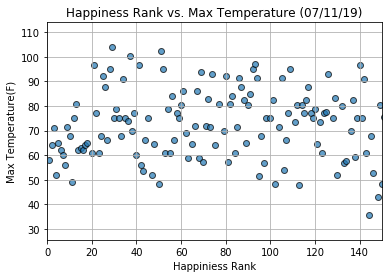

In [47]:
# Build a scatter plot and save figure

plt.scatter(mergedweather["Ladder"], mergedweather["Max Temp"], edgecolor="black", alpha=0.7)
plt.xlim(0,150)
plt.ylim(min(mergedweather["Max Temp"])-10, max(mergedweather["Max Temp"]+10))
plt.grid()

plt.title(f"Happiness Rank vs. Max Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel("Happiniess Rank")
plt.ylabel("Max Temperature(F)")

plt.show()


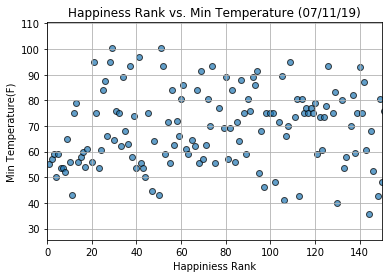

In [48]:
# Build a scatter plot and save figure

plt.scatter(mergedweather["Ladder"], mergedweather["Min Temp"], edgecolor="black", alpha=0.7)
plt.xlim(0,150)
plt.ylim(min(mergedweather["Min Temp"])-10, max(mergedweather["Min Temp"]+10))
plt.grid()

plt.title(f"Happiness Rank vs. Min Temperature ({time.strftime('%m/%d/%y')})")
plt.xlabel("Happiniess Rank")
plt.ylabel("Min Temperature(F)")

plt.show()